In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import zarr
#import tensorstore as ts
import dask.array as da
import napari
import numpy as np

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

sys.path.append('..')
from tracks_interactions.graph.family_graph import FamilyGraphWidget
from tracks_interactions.widget.widget_navigation import TrackNavigationWidget
from tracks_interactions.widget.widget_modifications import ModificationWidget

In [2]:
os.environ['NAPARI_PERFMON'] = '0'

from napari.settings import get_settings
settings = get_settings()
settings.experimental.async_
#settings.experimental.async_=True

False

In [3]:
# get images
ch0_path = r'R:\Kasia\tracking\TrackGardener\E6_C0.zarr'#r'D:\kasia\tracking\E6_exp\E6_C0.zarr'
ch1_path = r'R:\Kasia\tracking\TrackGardener\E6_C1.zarr'#r'D:\kasia\tracking\E6_exp\E6_C1.zarr'

ch0_list = []
for level in range(1,5):
    ch0_list.append(da.from_zarr(ch0_path,level))

ch1_list = []
for level in range(1,5):
    ch1_list.append(da.from_zarr(ch1_path,level))

# create empty labels canvas
empty_labels = np.zeros([ch0_list[0].shape[1],ch0_list[0].shape[2]]).astype(int)

In [4]:
# get access to the database
new_db_path = r'R:\Kasia\tracking\TrackGardener\Exp6_gardener_v6.db'#r'D:\kasia\tracking\E6_exp\double_segmentation_ultrack\Exp6_gardener_v6.db'
engine = create_engine(f'sqlite:///{new_db_path}')
session = sessionmaker(bind=engine)()

from sqlalchemy import text
session.execute(text("ANALYZE;"))
session.commit()

In [5]:
# display channels and labels
viewer = napari.Viewer()
ch1 = viewer.add_image(ch0_list, name='ch1', colormap = 'green',blending='additive',contrast_limits=[0, 2048])
ch2 = viewer.add_image(ch1_list, name='ch2', colormap = 'red',blending='additive',contrast_limits=[0, 2048])
labels = viewer.add_labels(empty_labels,name='Labels',metadata={'persistent_label':-1})
labels.selected_label = 0

In [5]:
from tracks_interactions.widget.widget_main import TrackGardener

viewer = napari.Viewer()

track_gardener = TrackGardener(viewer)
viewer.window.add_dock_widget(track_gardener,area='right',name='Track Gardener')

In [7]:
ch_names = [ch.get('name', 'Unnamed') for ch in track_gardener.settings_window.channels_list]
ch_data = track_gardener.settings_window.channels_data_list

NameError: name 'track_gardener' is not defined

In [8]:
ch_names

['ch0', 'ch1']

In [12]:
track_gardener.create_widgets(viewer, session,ch_data,ch_names,5)

AttributeError: 'TrackGardener' object has no attribute 'session'

In [8]:
d= {'modified':'x','apoptosis':'B','mitosis':'M','disappear':'D'}

In [9]:
track_navigation_widget = TrackNavigationWidget(viewer,session)
viewer.window.add_dock_widget(track_navigation_widget,area='right',name='Track Navigation')

plot_widget = FamilyGraphWidget(viewer,session)
viewer.window.add_dock_widget(plot_widget,area='bottom')

modification_widget = ModificationWidget(viewer,session,ch_list=[ch0_list[0],ch1_list[0]],tag_dictionary = d)
viewer.window.add_dock_widget(modification_widget,area='right',name='Track Modifications')


TypeError: invalid key Shift+B

In [8]:
signal_list = ['area','ch0_nuc','ch0_cyto','ch1_nuc','ch1_cyto']
signal_sel_list = ['ch0_nuc','ch0_cyto']
color_sel_list = ['green','yellow']

In [10]:
from tracks_interactions.widget.signal_graph_widget import CellGraphWidget
test = CellGraphWidget(viewer,session,signal_list,signal_sel_list=signal_sel_list,color_sel_list=color_sel_list,tag_dictionary=d)
viewer.window.add_dock_widget(test,area='right',name='Test')

In [13]:
import yaml
filePath = r'D:/kasia/tracking/E6_exp/sample_data/config.yaml'

with open(filePath, 'r') as file:
    config = yaml.safe_load(file)

    cell_tags = config.get('cell_tags', [])

cell_tags


{'modified': 'x', 'apoptosis': 'A', 'mitosis': 'M', 'disappear': 'D'}

## Tests and doodles

In [10]:
from tracks_interactions.db.db_model import NO_PARENT, CellDB, TrackDB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyqtgraph as pg
from sqlalchemy.orm.attributes import flag_modified
import tracks_interactions.db.db_functions as fdb

In [12]:
t=session.query(CellDB).first()
t.signals

{'area': 1102,
 'ch0_nuc': 629.3003629764065,
 'ch0_cyto': 303.49378330373,
 'ch1_nuc': 1022.0290381125227,
 'ch1_cyto': 342.5133214920071}

In [22]:
session.commit()

In [16]:
len(session.query(TrackDB).all())

56297

In [13]:
t=session.query(CellDB).filter(CellDB.track_id == 22304).order_by(CellDB.t).all()
t

[1004610 from frame 0 with track_id 22304 at (5359,4450),
 2004804 from frame 1 with track_id 22304 at (5367,4445),
 3004985 from frame 2 with track_id 22304 at (5364,4442),
 4005078 from frame 3 with track_id 22304 at (5362,4441),
 5005159 from frame 4 with track_id 22304 at (5362,4426),
 6005134 from frame 5 with track_id 22304 at (5364,4424),
 7005230 from frame 6 with track_id 22304 at (5363,4424),
 8005242 from frame 7 with track_id 22304 at (5360,4426),
 9005394 from frame 8 with track_id 22304 at (5356,4424),
 10005485 from frame 9 with track_id 22304 at (5355,4428),
 11005663 from frame 10 with track_id 22304 at (5362,4429),
 12005791 from frame 11 with track_id 22304 at (5355,4429),
 13005941 from frame 12 with track_id 22304 at (5358,4428),
 14006096 from frame 13 with track_id 22304 at (5352,4426),
 15006169 from frame 14 with track_id 22304 at (5353,4426),
 16006336 from frame 15 with track_id 22304 at (5353,4427),
 17006445 from frame 16 with track_id 22304 at (5352,4425),

In [26]:
query = (
    session.query(CellDB.t,CellDB.tags)
    .filter(CellDB.track_id == 56308)
    .order_by(CellDB.t)
    .all()

)
query

[(0, {'mitosis': True, 'apoptosis': False}),
 (1, {'apoptosis': False, 'mitosis': False}),
 (2, {'mitosis': False}),
 (3, {'mitosis': False}),
 (4, {'modified': 'True'}),
 (5, {}),
 (6, {}),
 (7, {'mitosis': False}),
 (8, {'mitosis': False}),
 (9, {'mitosis': False, 'apoptosis': False}),
 (10, {'mitosis': False}),
 (11, {'mitosis': False}),
 (12, {}),
 (13, {'modified': 'True'}),
 (14, {}),
 (15, {'modified': 'True'}),
 (16, {'modified': 'True'}),
 (17, {'modified': 'True'}),
 (18, {'modified': 'True'}),
 (19, {}),
 (20, {}),
 (21, {}),
 (22, {}),
 (23, {'modified': 'True'}),
 (24, {'modified': 'True'}),
 (25, {}),
 (26, {'disappear': False, 'mitosis': False, 'apoptosis': False}),
 (27, {}),
 (28, {}),
 (29, {}),
 (30, {'modified': 'True'}),
 (31, {'mitosis': False}),
 (32, {}),
 (33, {'mitosis': False}),
 (34, {'mitosis': False, 'modified': True}),
 (35, {}),
 (36, {}),
 (37, {}),
 (38, {}),
 (39, {'modified': 'True'}),
 (40, {}),
 (41, {}),
 (42, {'modified': 'True'}),
 (43, {}),
 (4

In [33]:
cell = query[8]
print(cell)
tags = cell.tags
print(tags)
tags['mitosis'] = True
print(tags)
cell.tags = tags
flag_modified(cell, 'tags')
session.commit()

88010055 from frame 87 with track_id 20913 at (5189,4197)
{}
{'mitosis': True}


In [34]:
cell = query[3]
cell.tags['mitosis'] = False
flag_modified(cell, 'tags')
session.commit()

In [61]:
cell_list = (
    session.query(CellDB)
    .filter(CellDB.t == 54)
    .filter(CellDB.track_id == 56308)
    .all()
)
cell_list[0].tags

{}

In [63]:
cell_list[0].tags['mitosis']

KeyError: 'mitosis'

Click at 1322.0,1322.0 translated to 244.4931018267203, 15.440209031430577


In [59]:
from sqlalchemy.orm.attributes import flag_modified
cell = cell_list[0]

cell.tags['mitosis'] = False

# Manually signal that the 'tags' attribute has been modified
flag_modified(cell, 'tags')

In [40]:
cell = cell_list[0]

# prepare tags
tags = cell.tags
if tags is not None:
    tags['mit'] = True
else:
    tags = {'mit': True}

cell.tags = tags

session.commit()

print(cell.tags)
print(tags)

{'mitosis': 'True'}
{'mitosis': 'True', 'mit': True}


In [39]:
cell.tags

{'mitosis': 'True'}

In [28]:
session.commit()

In [20]:
text = pg.TextItem(text='T', anchor=(0.5, 0))
test.graph.plot_view.addItem(text)
text.setPos(0,1000)

In [27]:
x_list = [item[0] for item in query if item[1].get('modified') == 'True']
y = test.graph.plot_view.viewRange()[1][1]
for x in x_list:
    text = pg.TextItem(text='x', anchor=(0.5, 0))
    test.graph.plot_view.addItem(text)
    text.setPos(x,y)

In [16]:
test.graph.plot_view.scatter_plot.setData(0,0)

AttributeError: 'PlotItem' object has no attribute 'scatter_plot'

In [14]:
query = (
    session.query(CellDB.t, CellDB.tags)
    .filter(CellDB.track_id == 56308)
    .order_by(CellDB.t)
    .all()
)
query

[(0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {}),
 (7, {}),
 (8, {}),
 (9, {}),
 (10, {}),
 (11, {}),
 (12, {}),
 (13, {'modified': 'True'}),
 (14, {}),
 (15, {'modified': 'True'}),
 (16, {'modified': 'True'}),
 (17, {'modified': 'True'}),
 (18, {'modified': 'True'}),
 (19, {}),
 (20, {}),
 (21, {}),
 (22, {}),
 (23, {'modified': 'True'}),
 (24, {'modified': 'True'}),
 (25, {}),
 (26, {}),
 (27, {}),
 (28, {}),
 (29, {}),
 (30, {'modified': 'True'}),
 (31, {}),
 (32, {}),
 (33, {}),
 (34, {}),
 (35, {}),
 (36, {}),
 (37, {}),
 (38, {}),
 (39, {}),
 (40, {}),
 (41, {}),
 (42, {}),
 (43, {}),
 (44, {}),
 (45, {}),
 (46, {}),
 (47, {}),
 (48, {}),
 (49, {}),
 (50, {}),
 (51, {}),
 (52, {}),
 (53, {}),
 (54, {}),
 (55, {}),
 (56, {}),
 (57, {}),
 (58, {}),
 (59, {}),
 (60, {}),
 (61, {}),
 (62, {}),
 (63, {}),
 (64, {}),
 (65, {}),
 (66, {}),
 (67, {}),
 (68, {}),
 (69, {}),
 (70, {}),
 (71, {}),
 (72, {}),
 (73, {}),
 (74, {'modified': 'True'}),
 (75, {}),
 (76, {}),
 

In [10]:
root_id = 16115
query = session.query(TrackDB).filter(TrackDB.root == root_id)
df = pd.read_sql(query.statement, session.bind)

# make sure that the root of this id exists
assert len(df) > 0, "No data for this root_id"

# add trunk
trunk_row = df.loc[df.track_id == root_id, :]


num=1,
start=trunk_row["t_begin"].values[0],
stop=trunk_row["t_end"].values[0],
accepted=trunk_row["accepted_tag"].values[0]


In [19]:
accepted = bool(accepted)

In [20]:
type(accepted)

bool

In [11]:
tr = session.query(TrackDB).filter(TrackDB.track_id == 6604).all()
tr

[Track 6604 from 2 to 79]

In [24]:
tr[0].parent_track_id

37101

In [15]:
session.query(TrackDB).filter(TrackDB.parent_track_id == 6605).all()

[]

In [14]:
session.query(TrackDB).filter(TrackDB.track_id == 5408).all()

[Track 6606 from 80 to 205]

In [51]:
query = (session.query(CellDB)
            .filter(CellDB.track_id == 5408)
            .all()
        )
query

[1001100 from frame 0 with track_id 5408 at (2200,1983),
 2001162 from frame 1 with track_id 5408 at (2202,1987),
 3001219 from frame 2 with track_id 5408 at (2201,1989),
 4001189 from frame 3 with track_id 5408 at (2203,1991),
 5001220 from frame 4 with track_id 5408 at (2200,1990),
 6001206 from frame 5 with track_id 5408 at (2204,1993),
 7001265 from frame 6 with track_id 5408 at (2204,1991),
 8001286 from frame 7 with track_id 5408 at (2207,1993),
 9001298 from frame 8 with track_id 5408 at (2206,1993),
 10001355 from frame 9 with track_id 5408 at (2203,1992),
 11001359 from frame 10 with track_id 5408 at (2207,1991),
 12001384 from frame 11 with track_id 5408 at (2209,1991),
 13001475 from frame 12 with track_id 5408 at (2208,1994),
 14001459 from frame 13 with track_id 5408 at (2211,1989),
 15001464 from frame 14 with track_id 5408 at (2209,1991),
 16001459 from frame 15 with track_id 5408 at (2210,1995),
 17001509 from frame 16 with track_id 5408 at (2208,1995),
 18001468 from f

In [52]:
row_start = min(cell.bbox_0 for cell in query)
row_stop = max(cell.bbox_2 for cell in query)
column_start = min(cell.bbox_1 for cell in query)
column_stop = max(cell.bbox_3 for cell in query)
t_start = min(cell.t for cell in query)
t_stop = max(cell.t for cell in query)

track_bbox = (t_start, t_stop, row_start, row_stop, column_start, column_stop)

In [75]:
track_bbox

(0, 56, 2184, 2249, 1971, 2038)

In [95]:
active_label = 6
new_track = 5408

labels = viewer.layers["Labels"].data

sel = labels[
    track_bbox[0] : track_bbox[1] + 1,
    track_bbox[2] : track_bbox[3],
    track_bbox[4] : track_bbox[5],
]

sel = sel.read().result()
sel[sel == active_label] = new_track

labels[
    track_bbox[0] : track_bbox[1] + 1,
    track_bbox[2] : track_bbox[3],
    track_bbox[4] : track_bbox[5],
] = sel

viewer.layers['Labels'].refresh()

In [78]:
labels = viewer.layers["Labels"].data

sel = labels[
    track_bbox[0] : track_bbox[1] + 1,
    track_bbox[2] : track_bbox[3],
    track_bbox[4] : track_bbox[5],
]

sel.shape

(57, 65, 67)

In [79]:
sel.read().result()[0,10,10]

5408

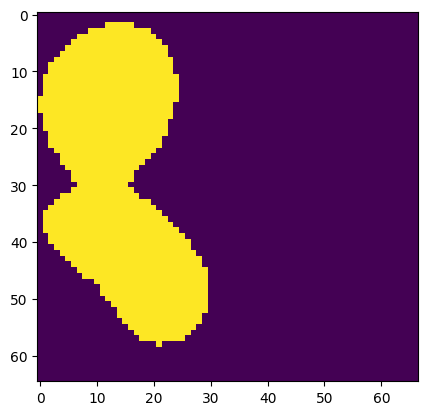

In [73]:
plt.imshow(sel.read().result()[0,:,:])

In [45]:
viewer.layers["Labels"].data[0,0,0] = 4000

In [43]:
viewer.layers["Labels"].data[0,0,0].read().result()

array(3000)

In [26]:
await viewer.layers["Labels"].data.commit()

AttributeError: 'tensorstore.TensorStore' object has no attribute 'commit'

In [25]:
labels[
    track_bbox[0] : track_bbox[1] + 1,
    track_bbox[2] : track_bbox[3],
    track_bbox[4] : track_bbox[5],
]

TensorStore({
  'context': {
    'cache_pool': {},
    'data_copy_concurrency': {},
    'file_io_concurrency': {},
    'file_io_sync': True,
  },
  'driver': 'zarr',
  'dtype': 'int32',
  'kvstore': {
    'driver': 'file',
    'path': 'D:\\kasia\\tracking\\E6_exp\\double_segmentation_ultrack\\labels_double_1024.zarr/',
  },
  'metadata': {
    'chunks': [1, 1024, 1024],
    'compressor': {
      'blocksize': 0,
      'clevel': 5,
      'cname': 'lz4',
      'id': 'blosc',
      'shuffle': 1,
    },
    'dimension_separator': '/',
    'dtype': '<i4',
    'fill_value': None,
    'filters': None,
    'order': 'C',
    'shape': [240, 8395, 8400],
    'zarr_format': 2,
  },
  'transform': {
    'input_exclusive_max': [1, 5854, 4832],
    'input_inclusive_min': [0, 5809, 4807],
  },
})

In [23]:
sel

array([[[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0, 56303, 56303, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]]])

In [ ]:
    if type(viewer.layers["Labels"].data) == ts.TensorStore:
        sel = sel.read().result()

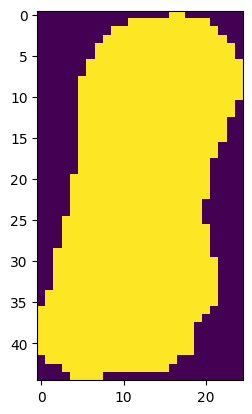

In [11]:
cell = cell_list[0]

plt.imshow(cell.mask)


In [12]:
cell.signals

{'area': 1245,
 'ch0_nuc': 1687.6963855421686,
 'ch0_cyto': 196.18211382113822,
 'ch1_nuc': 540.2040160642571,
 'ch1_cyto': 172.7479674796748}

In [14]:
viewer.layers["Labels"].selected_label = -1
#viewer.layers["Labels"].selected_label = 41577

In [18]:
from tracks_interactions.db.db_functions import add_CellDB_to_DB, calculate_cell_signals
from sqlalchemy import inspect

In [20]:
# prepare tags 
tags = cell.tags
if tags is not None:
    tags['modified'] = 'True'
else:
    tags = {'modified':'True'}

#  create CellDB
new_cell = add_CellDB_to_DB(viewer)
new_cell.tags = tags

session.delete(cell)
session.add(new_cell)
session.commit()

In [27]:
session.commit()

ValueError: operands could not be broadcast together with shapes (86,190) (33,51) 

In [17]:
cell.mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])